In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle as pk

In [2]:
dataset = pd.read_csv('loan_approval_dataset.csv')
df = pd.DataFrame(dataset)

In [3]:
df.drop(columns=['loan_id'])

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df['Assets'] = df.residential_assets_value + df.commercial_assets_value+df.luxury_assets_value + df.bank_asset_value

In [6]:
df.drop(columns=['residential_assets_value','commercial_assets_value','bank_asset_value','luxury_assets_value'])

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


In [7]:
df.education = df.education.str.strip()

In [8]:
df['education'] = df['education'].replace(['Graduate','Not Graduate'],[1,0])

In [9]:
df.self_employed = df.self_employed.str.strip()

In [10]:
df.self_employed = df.self_employed.replace(['Yes','No'],[1,0])
df.self_employed.unique()

array([0, 1], dtype=int64)

In [11]:
df.loan_status.str.strip()
df['loan_status'] = df['loan_status'].replace(['Rejected','Approved'],[0,1])

In [12]:
X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [14]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [15]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_scaler,y_train)
score_KNN = KNN.score(x_test_scaler,y_test)

In [16]:
NB = GaussianNB()
NB.fit(x_train_scaler,y_train)
score_NB = NB.score(x_test_scaler,y_test)

In [17]:
NN = MLPClassifier()
NN.fit(x_train_scaler,y_train)
score_NN = NN.score(x_test_scaler,y_test)

c:\Users\Elcom\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
DT = DecisionTreeClassifier()
DT.fit(x_train_scaler,y_train)
score_DT = DT.score(x_test_scaler,y_test)

In [19]:
LO = LogisticRegression()
LO.fit(x_train_scaler,y_train)
score_LO = LO.score(x_test_scaler,y_test)

In [20]:
RF = RandomForestClassifier()
RF.fit(x_train_scaler,y_train)
score_RF = RF.score(x_test_scaler,y_test)

In [21]:
SVM = SVC()
SVM.fit(x_train_scaler,y_train)
score_SVM = SVM.score(x_test_scaler,y_test)

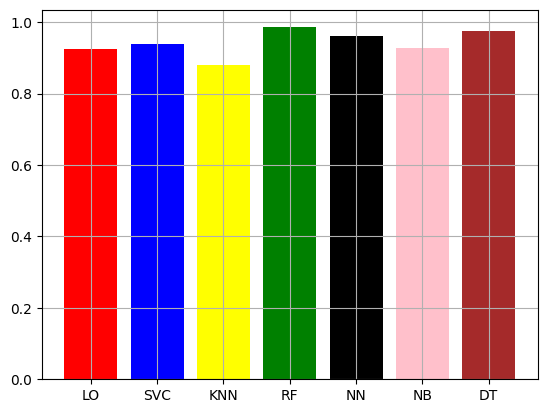

In [22]:
models = ['LO','SVC','KNN','RF','NN','NB','DT']
scores = [score_LO,score_SVM,score_KNN,score_RF,score_NN,score_NB,score_DT]
colors = ['red','blue','yellow','green','black','pink','brown']
plt.bar(models,scores,color=colors)
plt.grid()
plt.savefig('models')
plt.show()

In [23]:
model = max(scores)
model

0.9859484777517564

In [24]:
pk.dump(model,open('model.pkl','wb'))
pk.dump(scaler,open('scaler.pkl','wb'))